In [1]:
import skimage.io as io

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray,rgb2hsv,rgba2rgb
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import random_noise
import numpy as np

from skimage.exposure import histogram
from matplotlib.pyplot import bar


In [2]:

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

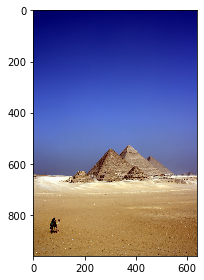

In [3]:
# Ex: imread and imshow 
pyramids = io.imread('pyramids.jpeg')
io.imshow(pyramids)
io.show()



In [4]:
# Use this function to show a histogram
# The image should be gray-scale and should range from 0 to 1
def showHist(img,histogramImg):
    plt.figure()
    bar(histogramImg[1]*255, histogramImg[0], width=0.8, align='center')

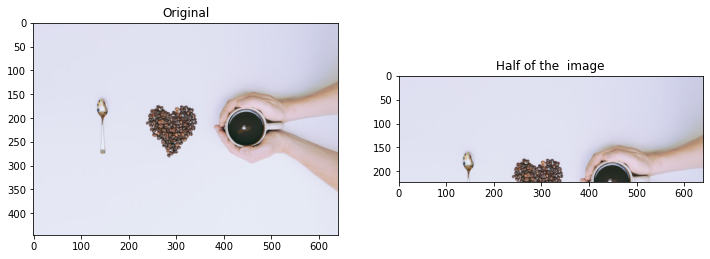

In [5]:
'''
@TODO:
Requirement #1 
-Read and print image 'coffee'  
-Show and print half of the  image
-----hint :use the attribute shape of numpy to get the image object dimentions
'''
def half_image(img):
    image = io.imread(img)
    half_image=image[0:int(image.shape[0]/2)]
    show_images(images=[image,half_image],titles=['Original','Half of the  image'])
    
    
half_image(img='coffee.jpeg')


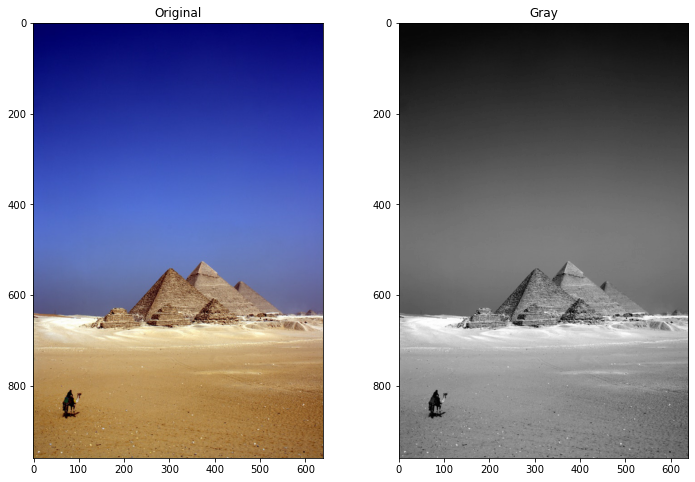

In [6]:
'''
@TODO:
Requirement #2 
RGB to gray and HSV:
1- Write a function 'gray_image' that takes an image as input , then
    -get the gray scale of the image, then
    -display original image and the gray scale one side by side (subplot).
    -hint: use rgb2gray to get the graylevel of the image
- test your function with the image 'pyramids'
'''
def gray_image(image):
    pyramids = io.imread(image)
    pyramidsGray = rgb2gray(pyramids)
    show_images(images=[pyramids,pyramidsGray],titles=['Original','Gray'])

gray_image(image='pyramids.jpeg')    



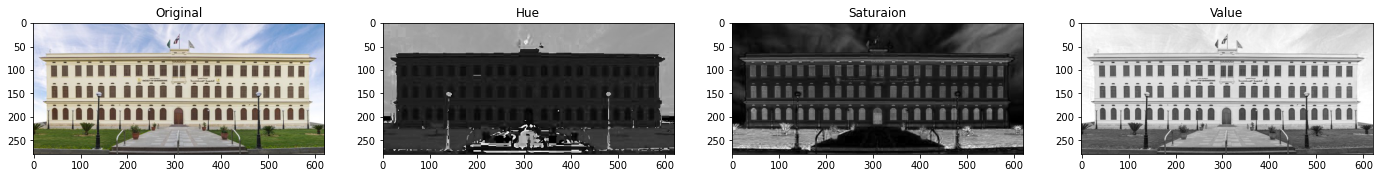

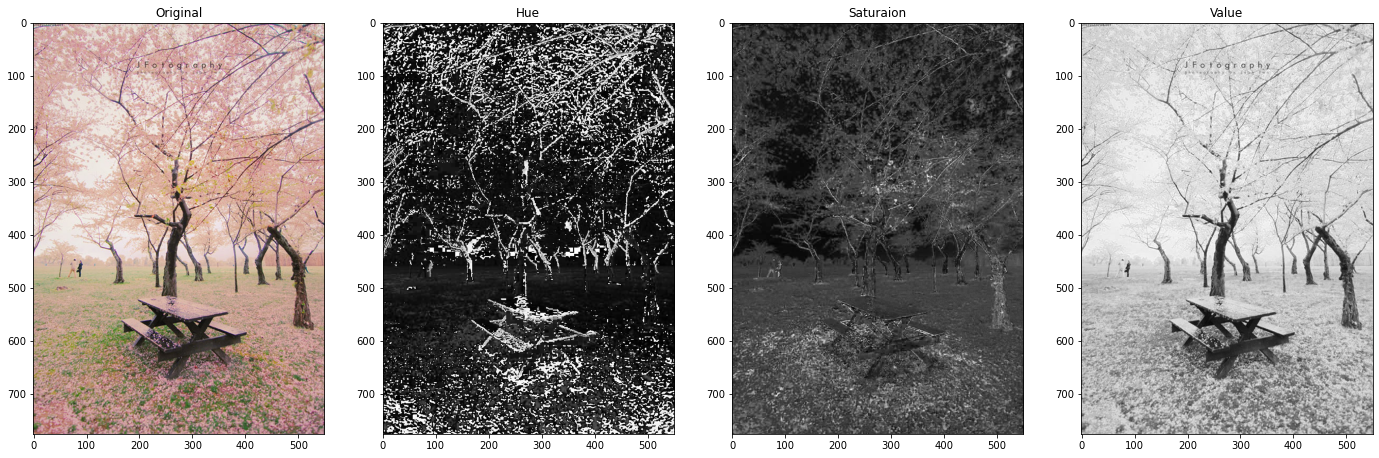

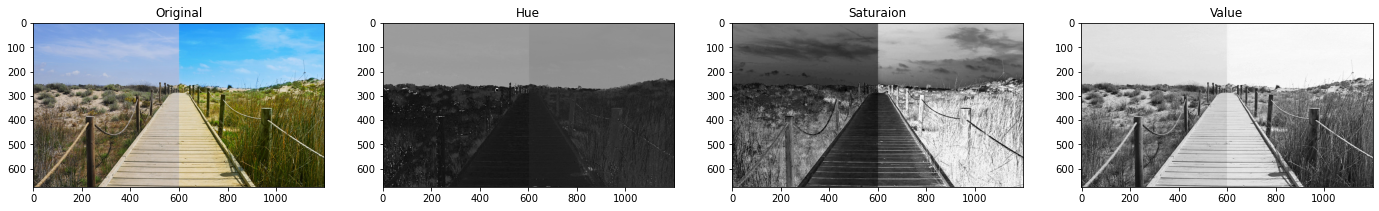

'\nHue :\n\n    Hue is the color of image from 0 to 360\n    \nSaturation:\n    saturation describe amout of gray\n\nvalue:\n    value is brightess \n'

In [16]:

'''
2- Write a function 'HSV_image' that takes an image as input , then
   -show the RGB image and the (3 channels of HSV image each channel in separated form ) one side by side (subplot).
   -hint: -use rgb2hsv (to get the hsv representation of the image).
          -To separately get the Hue, Saturation and Value channels, use hsvImg[:,:,X], 
           where hsvImg is the hsv representation of the image. 
           Hue is the first channel, Saturation is the second and value is the last channel.
- test your function for the images in HSV Folder. And comment on the results. 
'''

def HSV_image(image):
    img=io.imread(image)
    HSVimg=rgb2hsv(img)
    Hue=HSVimg[:,:,0]
    Sat=HSVimg[:,:,1]
    Val=HSVimg[:,:,2]
    show_images(images=[img,Hue,Sat,Val],titles=['Original','Hue','Saturaion','Value'])
      
HSV_image(image='./hsv/ex1.png')  
HSV_image(image='./hsv/ex2.jpg')  
HSV_image(image='./hsv/ex3.jpg')  

# Hue :

#     Hue is the color of image from 0 to 360
    
# Saturation:
#     saturation describe amout of gray

# value:
#     value is brightess 


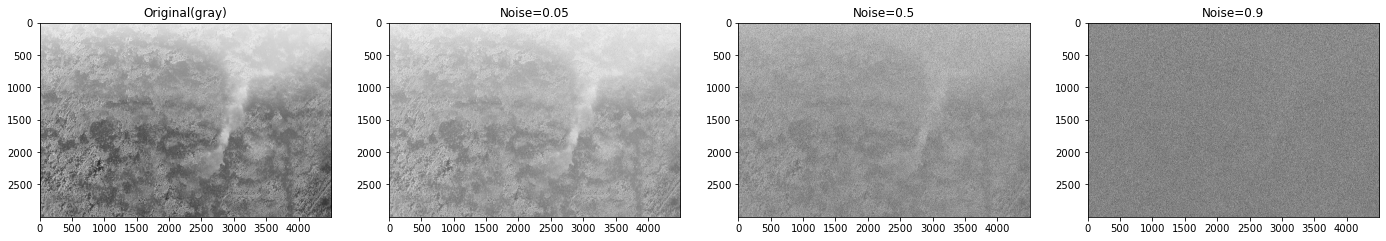

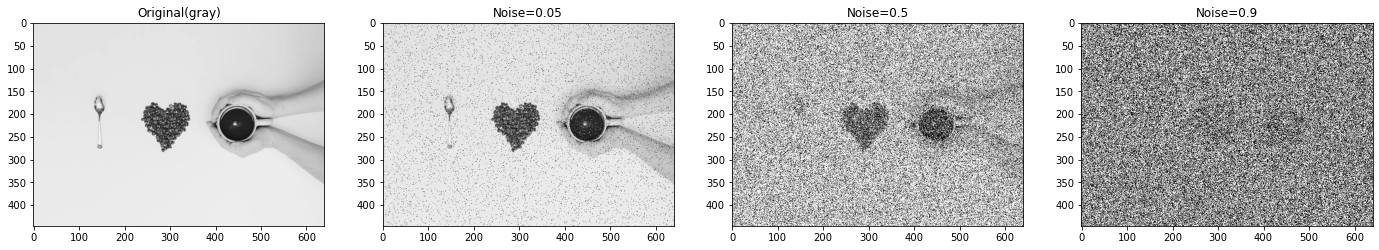

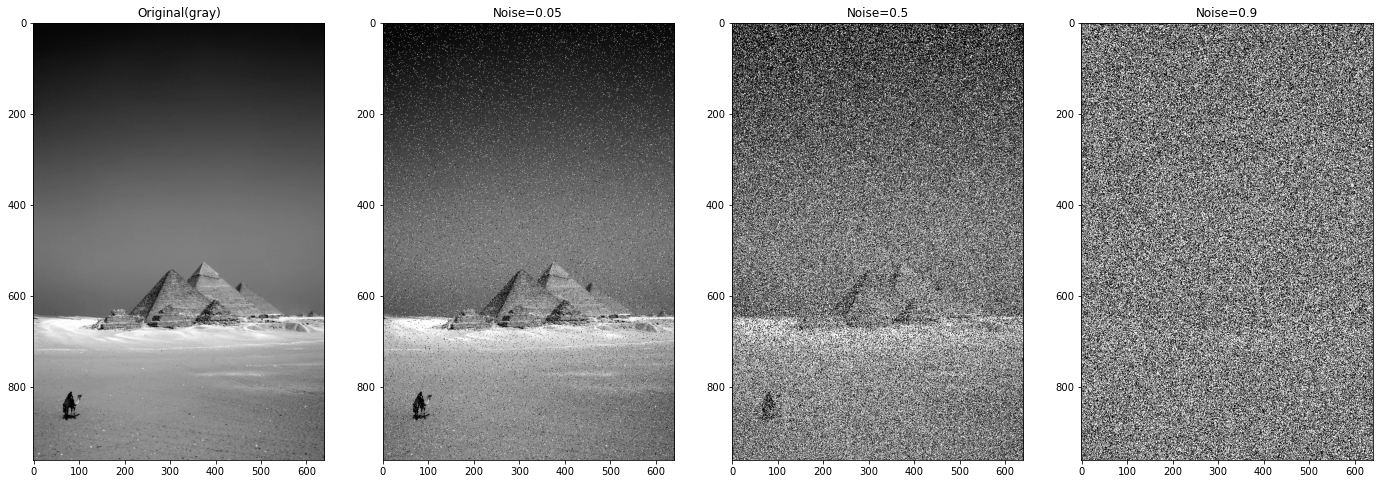

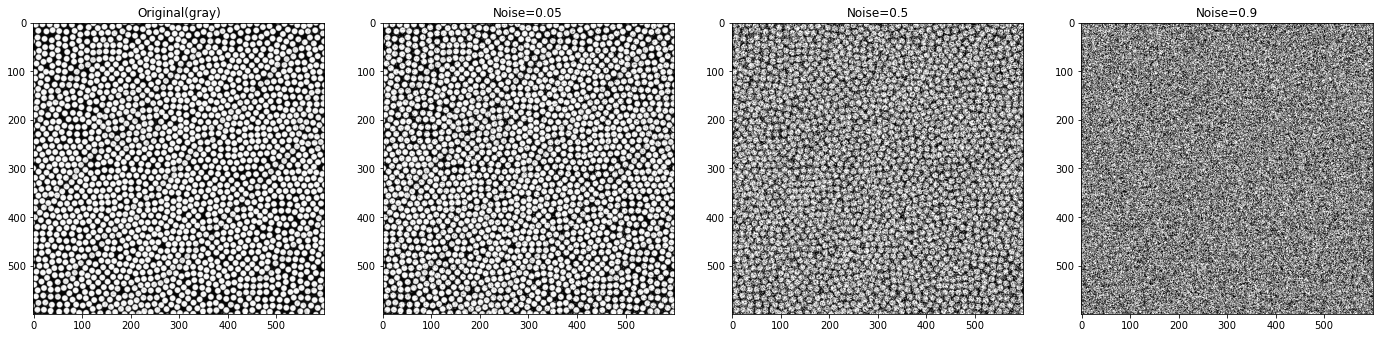

In [14]:
'''
Requirement 2 (Noise):
http://scikit-image.org/docs/dev/api/skimage.util.html#skimage.util.random_noise

1.For an image of your choice (the effect of noise must be obvious): 
    Read the image.
    Convert it to greyscale.
    Apply salt & pepper noise with 
    amount=0.05, 0.5 and 0.9
   
2. From the other images. Recommend one image that won’t be greatly affected by the noise and state why.    
    '''

def Noise_images(path):
    img = io.imread(path)
    grayImage = rgb2gray(img)
    grayImage1 = random_noise(grayImage, mode='s&p',amount=0.05)
    grayImage2 = random_noise(grayImage, mode='s&p',amount=0.5)
    grayImage3 = random_noise(grayImage, mode='s&p',amount=0.9)
    show_images(images=[grayImage,grayImage1,grayImage2,grayImage3],titles=['Original(gray)','Noise=0.05','Noise=0.5','Noise=0.9'])


Noise_images(path='./histogram/ex1.jpg')
Noise_images(path='coffee.jpeg')
Noise_images(path='pyramids.jpeg')
Noise_images(path='OIP.jpg')

## if iamge has white & black pixels equally randomized each pixel has diffrent values around

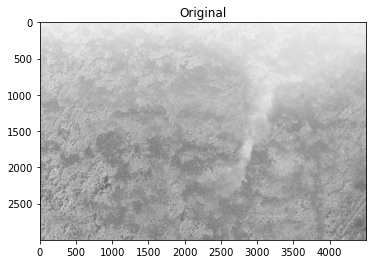

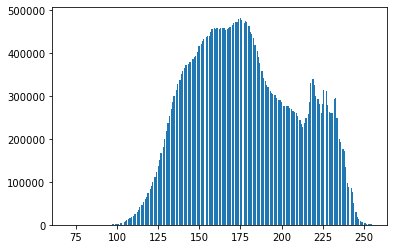

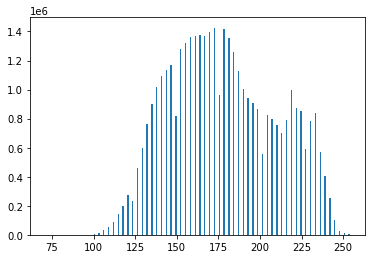

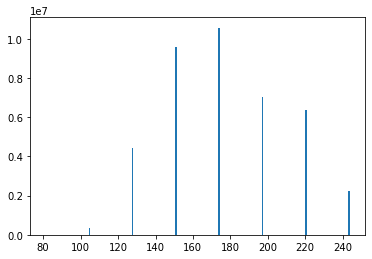

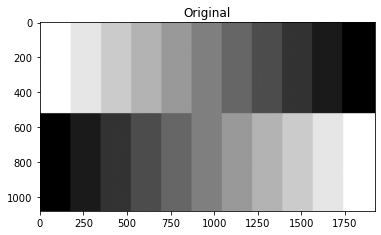

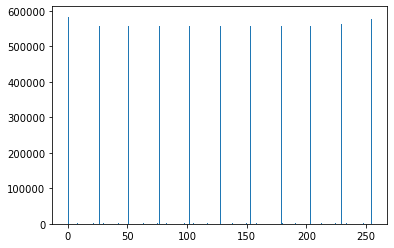

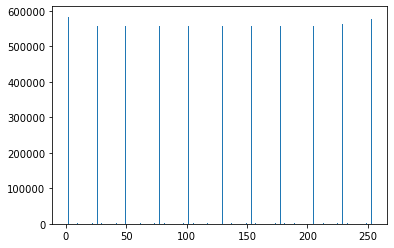

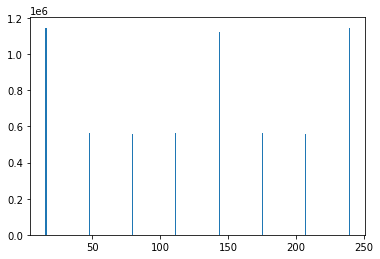

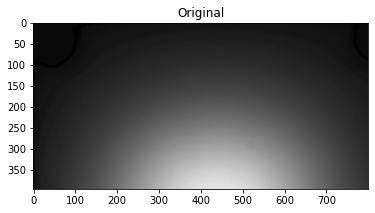

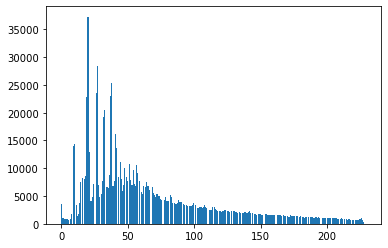

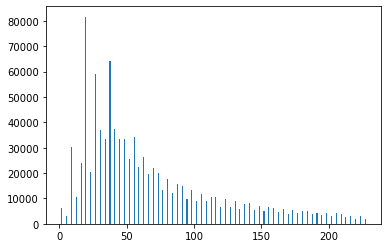

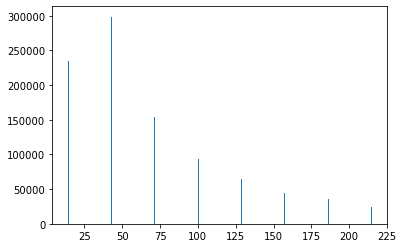

In [15]:

'''
Requirement 3 (Histogram):

1- For the given images ( in histogram folder): 
    Read the image.
    Apply histogram and show it.
Hint
    A) Use histogram (image) to get histogram. Try different values for nbins (256,64,8), What does it mean?
            nbins is number of bars(regions) in  histogram 
            
    B) and function(showHist) to draw it.
'''
ex1_histogram =io.imread('./histogram/ex1.jpg')
ex2_histogram =io.imread('./histogram/ex2.png')
ex3_histogram =io.imread('./histogram/ex3.png')
images_histogram=[ex1_histogram,ex2_histogram,ex3_histogram];
for x in images_histogram:
    if(x.shape[2]==4):
        x=rgba2rgb(x)
        x=x*255
    gray=x/255
    plt.figure()   
    plt.title("Original")
    plt.imshow(gray)
    #nbins 256 
    histogramImg_256=histogram(gray,nbins=256)
    showHist(img=gray,histogramImg=histogramImg_256)
    #nbins 64
    histogramImg_64=histogram(gray,nbins=64)
    showHist(img=gray,histogramImg=histogramImg_64)
    #nbins 8
    histogramImg_8=histogram(gray,nbins=8)
    showHist(img=gray,histogramImg=histogramImg_8)
# nbins is number of bars(region) in  histogram
# Note image 4 or 3
# ex2 png 4 channel 
# ex3 png 3 channel

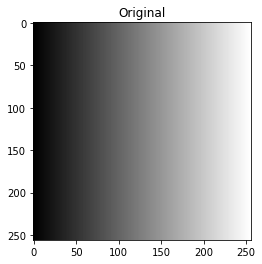

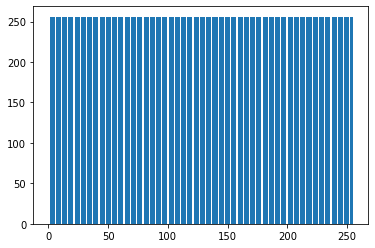

In [10]:
'''
** 2- Draw a grey-scale image that has uniform histogram 
same number of pixels for all intensity levels) using code only. Let the size of the image be 256x256.
use np.ones to draw image with ones.
'''
unifrom_image=np.ones((256,256),dtype='float64')
m=unifrom_image.shape[1]
for x in range(m):
    unifrom_image[:,x]=x

show_images(images=[unifrom_image],titles=['Original'])
unifrom_image/=255.0
histogram_unifrom=histogram(unifrom_image,nbins=256)
showHist(img=unifrom_image,histogramImg=histogram_unifrom)
## there arse space because 48/255 ..etc be scaled